# **Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, auc
import seaborn as sns

These libraries are used for data generation, preprocessing, model evaluation, visualization, and building the neural network.

# **Generate synthetic dataset with 5 classes**

In [ ]:

X, y = make_classification(n_samples=1000,
                           n_features=20,
                           n_informative=15,
                           n_redundant=2,
                           n_repeated=0,
                           n_classes=5,
                           n_clusters_per_class=1,
                           random_state=42)

Create synthetic data for a classification problem with 1000 examples and 5 classes.
 Each example has 20 features, where 15 help decide the class and 2 are related to them.
 The random seed (42) makes sure we get the same data every time we run the code.

# **Split the dataset into training and testing sets**

In [ ]:



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

Shape of X_train: (800, 20)
Shape of X_test: (200, 20)
Shape of y_train_encoded: (800, 5)
Shape of y_test_encoded: (200, 5)


 Split the data into training and test sets (80% train, 20% test).
Then scale the features so all values are on the same scale.
 Convert the class labels to one-hot vectors for training the neural network

# **NeuralNetwork**

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.hidden_size3 = hidden_size3
        self.output_size = output_size

        # Initialize weights and biases for each layer
        self.W1 = np.random.randn(self.input_size, self.hidden_size1) * 0.01
        self.b1 = np.zeros((1, self.hidden_size1))
        self.W2 = np.random.randn(self.hidden_size1, self.hidden_size2) * 0.01
        self.b2 = np.zeros((1, self.hidden_size2))
        self.W3 = np.random.randn(self.hidden_size2, self.hidden_size3) * 0.01
        self.b3 = np.zeros((1, self.hidden_size3))
        self.W4 = np.random.randn(self.hidden_size3, self.output_size) * 0.01
        self.b4 = np.zeros((1, self.output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        # First hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        # Second hidden layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        # Third hidden layer
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = self.sigmoid(self.z3)

        # Output layer (softmax for multi-class)
        self.z4 = np.dot(self.a3, self.W4) + self.b4
        self.y_pred_proba = self.softmax(self.z4)

        return self.y_pred_proba

    def backward(self, X, y, learning_rate):
        m = X.shape[0]

        # Output layer gradients
        dz4 = self.y_pred_proba - y
        dW4 = (1 / m) * np.dot(self.a3.T, dz4)
        db4 = (1 / m) * np.sum(dz4, axis=0, keepdims=True)

        # Third hidden layer gradients (using derivative of sigmoid)
        da3 = np.dot(dz4, self.W4.T)
        dz3 = da3 * self.sigmoid(self.z3) * (1 - self.sigmoid(self.z3))
        dW3 = (1 / m) * np.dot(self.a2.T, dz3)
        db3 = (1 / m) * np.sum(dz3, axis=0, keepdims=True)

        # Second hidden layer gradients
        da2 = np.dot(dz3, self.W3.T)
        dz2 = da2 * self.sigmoid(self.z2) * (1 - self.sigmoid(self.z2))
        dW2 = (1 / m) * np.dot(self.a1.T, dz2)
        db2 = (1 / m) * np.sum(dz2, axis=0, keepdims=True)

        # First hidden layer gradients
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.sigmoid(self.z1) * (1 - self.sigmoid(self.z1))
        dW1 = (1 / m) * np.dot(X.T, dz1)
        db1 = (1 / m) * np.sum(dz1, axis=0, keepdims=True)

        # Update weights and biases
        self.W4 -= learning_rate * dW4
        self.b4 -= learning_rate * db4
        self.W3 -= learning_rate * dW3
        self.b3 -= learning_rate * db3
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

 This code builds a neural network with 3 hidden layers and one output layer.
It takes in input data, processes it through layers using sigmoid activations,
 and outputs class probabilities using the softmax function.
 During training, it adjusts the weights using backpropagation to reduce prediction errors.
 The network is meant to classify data into multiple classes using one-hot encoded labels.

# **Training and Testing model**

In [ ]:
# Initialize the neural network
input_size = X_train.shape[1]
hidden_size1 = 64
hidden_size2 = 32
hidden_size3 = 16
output_size = 5  # Number of classes

model = NeuralNetwork(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)

# Train model
learning_rate = 0.01
epochs = 100

for epoch in range(epochs):
    model.forward(X_train)
    loss = -np.sum(y_train_encoded * np.log(model.y_pred_proba + 1e-15)) / y_train_encoded.shape[0]
    model.backward(X_train, y_train_encoded, learning_rate)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# Test model
y_pred = model.predict(X_test)



Epoch 0: Loss = 1.6095
Epoch 10: Loss = 1.6094
Epoch 20: Loss = 1.6093
Epoch 30: Loss = 1.6093
Epoch 40: Loss = 1.6092
Epoch 50: Loss = 1.6092
Epoch 60: Loss = 1.6091
Epoch 70: Loss = 1.6091
Epoch 80: Loss = 1.6091
Epoch 90: Loss = 1.6091


This code sets up and trains the neural network with training data.
It defines the number of neurons in each layer and creates the model.
During training, it uses forward propagation to make predictions and backward propagation to learn.
Every 10 epochs, it prints out the current loss to monitor training progress.
Finally, it uses the trained model to predict classes for the test data.


# **Evaluate Performance**

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Test Accuracy: 0.1700
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        45
           1       1.00      0.00      0.00        38
           2       1.00      0.00      0.00        39
           3       0.17      1.00      0.29        34
           4       1.00      0.00      0.00        44

    accuracy                           0.17       200
   macro avg       0.83      0.20      0.06       200
weighted avg       0.86      0.17      0.05       200



Calculate accuracy by comparing predicted labels with actual test labels.
 Print the classification report showing precision, recall, and F1-score for each class.
The 'zero_division=1' argument ensures no errors if any class has no predicted samples.


# **Confusion Matrix**

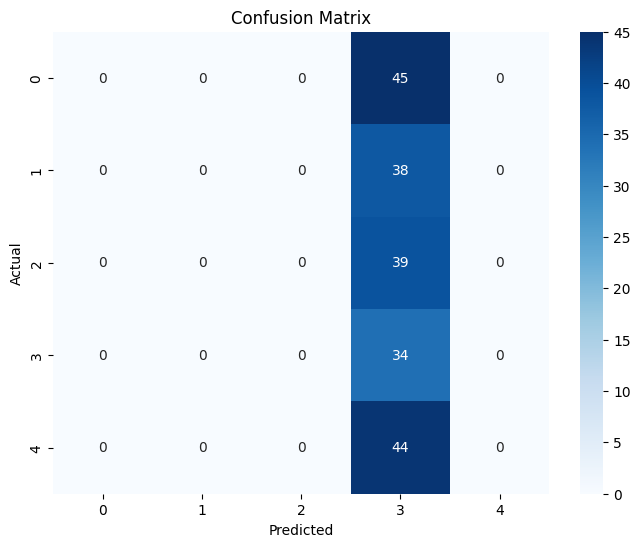

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Plot and visualize the confusion matrix to evaluate model performance.
The heatmap displays the actual vs predicted class counts with annotated values.


# **Generate ROC Curves**

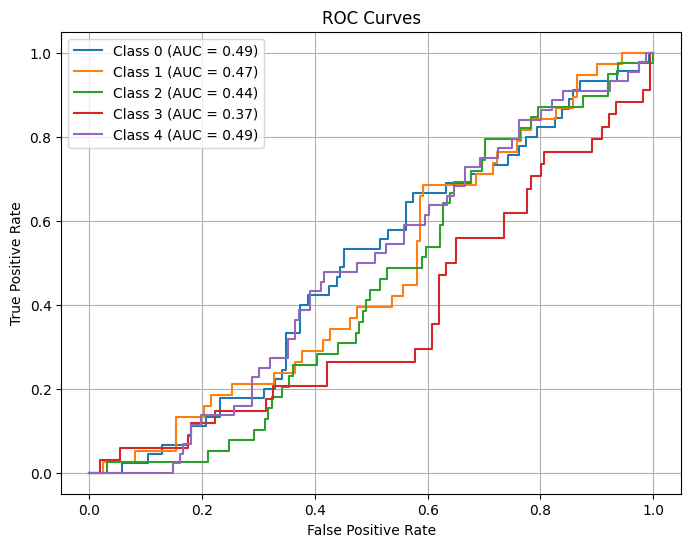

In [ ]:

y_pred_proba_test = model.forward(X_test)
plt.figure(figsize=(8, 6))
for i in range(5):
    fpr, tpr, _ = roc_curve(y_test_encoded[:, i], y_pred_proba_test[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc(fpr, tpr):.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

Generate and plot ROC curves for each class to evaluate model's classification performance. The curves display the trade-off between the false positive rate and true positive rate with AUC for each class.


# **Conclusions:**


 The code creates a multi-layer neural network to classify a synthetic dataset with five classes. It preprocesses the data by scaling features and one-hot encoding the labels. The model is trained using backpropagation for 100 epochs with gradient descent, and its performance is evaluated using accuracy, classification reports, confusion matrix, and ROC curves. The confusion matrix shows how well the model distinguishes between classes, while the ROC curves help assess its discriminatory ability. Overall, the model provides a solid foundation for multi-class classification with further room for improvement and optimization.